### import libraries

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



### Load diabetes data from CSV file


In [41]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("data/diabetes.csv", header=None, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Split into training and test data

In [42]:
print(df.shape)
df.describe()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
print(df.label.value_counts())

label
0    500
1    268
Name: count, dtype: int64


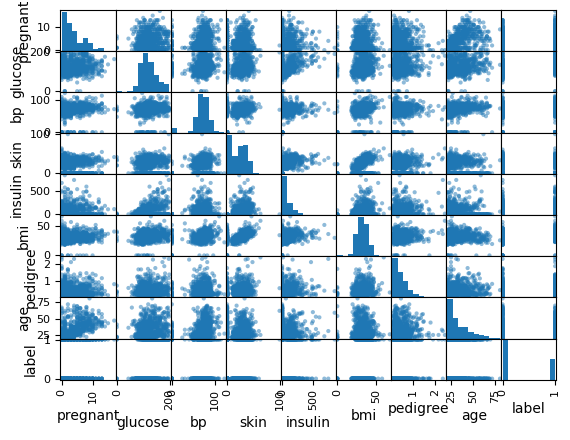

In [44]:
pd.plotting.scatter_matrix(df)
plt.show()

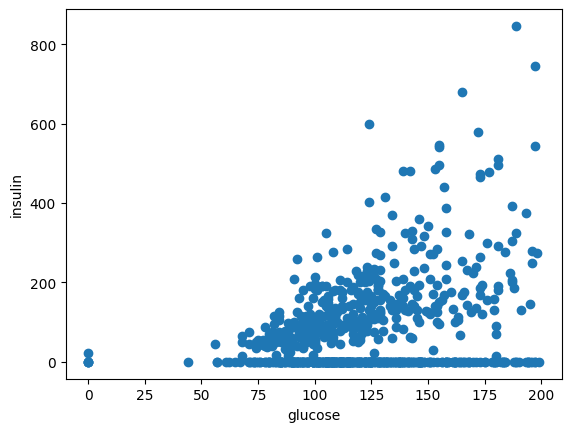

In [45]:

plt.scatter(df.glucose, df.insulin)
plt.xlabel("glucose")
plt.ylabel("insulin")
plt.show()
 

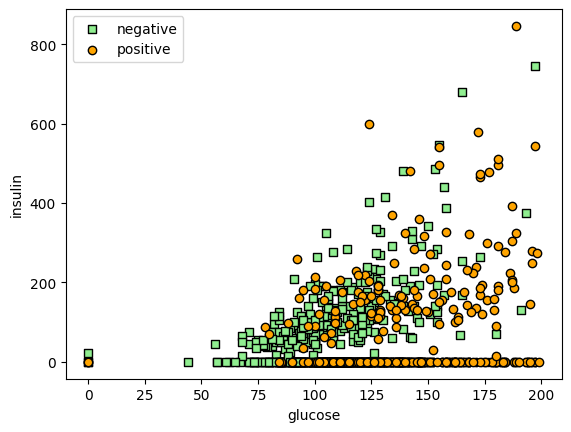

In [46]:
d = df.to_numpy()
# Do glucose (index 1) and insulin (index 4) seperate the classes? 

plt.scatter(
    d[d[:,8] == 0, 1], d[d[:,8] == 0, 4],
    c='lightgreen', marker='s', edgecolor='black',
    label='negative'
)


plt.scatter(
    d[d[:,8] == 1, 1], d[d[:,8] == 1, 4],
    c='orange', marker='o', edgecolor='black',
    label='positive'
)

plt.xlabel('glucose')
plt.ylabel('insulin')
plt.legend(loc="upper left")

plt.show()

In [47]:
X = df.drop(columns = ['label'])
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .3, random_state = 1, stratify = y)

### use cross validation to pick the optimal value of max_depth

In [48]:
for d in range(1,20) :
 tree = DecisionTreeClassifier(max_depth=d)
 scores = cross_val_score(tree, X_train, y_train, cv=5)
 print("d: ",d, " Val Accuracy: ",scores.mean())

d:  1  Val Accuracy:  0.6947559709241953
d:  2  Val Accuracy:  0.7337660089996538
d:  3  Val Accuracy:  0.7189511941848391
d:  4  Val Accuracy:  0.7001730702665282
d:  5  Val Accuracy:  0.7318795430944963
d:  6  Val Accuracy:  0.7281585323641397
d:  7  Val Accuracy:  0.7336794738663897
d:  8  Val Accuracy:  0.718760816891658
d:  9  Val Accuracy:  0.7150571131879543
d:  10  Val Accuracy:  0.7374004845967462
d:  11  Val Accuracy:  0.7225164416753203
d:  12  Val Accuracy:  0.7187088958116996
d:  13  Val Accuracy:  0.7150398061613015
d:  14  Val Accuracy:  0.7132052613361024
d:  15  Val Accuracy:  0.7224645205953617
d:  16  Val Accuracy:  0.7132052613361025
d:  17  Val Accuracy:  0.7150051921079958
d:  18  Val Accuracy:  0.7243336794738664
d:  19  Val Accuracy:  0.7336102457597784


In [58]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### Find the accuracy and confusion matrix.

In [59]:
from sklearn import metrics

In [60]:
print("Training Accuracy:", tree.score(X_train, y_train))

Training Accuracy: 0.7783985102420856


In [61]:
print("Test Accuracy:", tree.score(X_test, y_test))

Test Accuracy: 0.7575757575757576


In [62]:
y_predict = tree.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.7575757575757576


### max_depth 2 accuracy score is: 0.7575
### max_depth 3 accuracy score is: 0.7575
### max_depth 5 accuracy score is: 0.7489

In [63]:
conMat = confusion_matrix(y_test, y_predict)
print(conMat)

[[132  18]
 [ 38  43]]


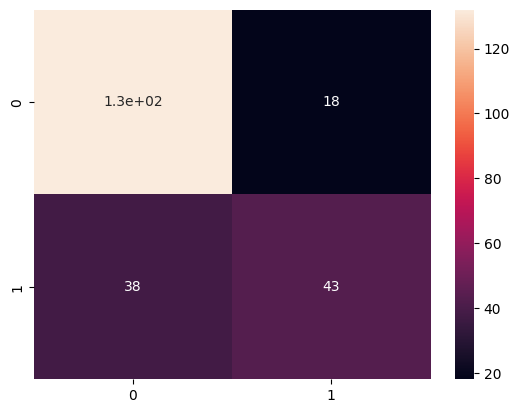

In [64]:
import seaborn as sns
sns.heatmap(conMat, annot=True)
plt.show()

### Plot the decision tree.

In [65]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

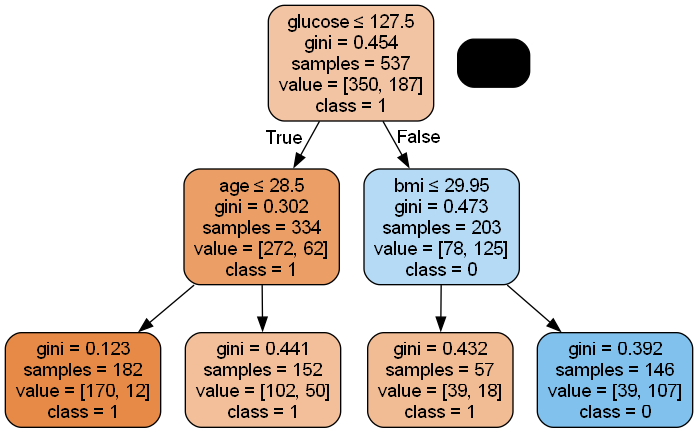

In [66]:
feature_names = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age"]
target_names = ["1","0"]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = feature_names,class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())